# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

<IPython.core.display.Javascript object>


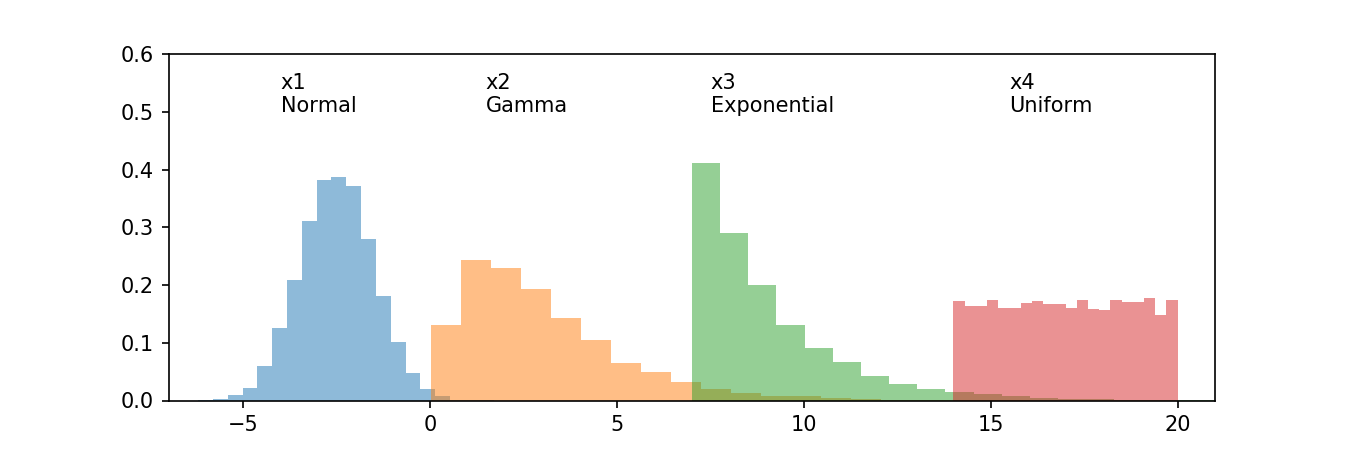

In [57]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, normed=True, bins=20, alpha=0.5)
plt.hist(x2, normed=True, bins=20, alpha=0.5)
plt.hist(x3, normed=True, bins=20, alpha=0.5)
plt.hist(x4, normed=True, bins=20, alpha=0.5);
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

In [97]:
import matplotlib.animation as animation
import matplotlib.gridspec as gridspec
def update(curr):
    # check if animation is at the last frame, and if so, stop the animation a
    if curr == 1000: 
        a.event_source.stop()
    normal_histogram.cla()
    bins = np.arange(-6, 1, 0.5)
    normal_histogram.hist(x1[:curr], normed=True, bins=np.arange(-7,21, 0.5),color='blue')
    normal_histogram.axis([-6,1,0,1.0])
    normal_histogram.text(x1.mean()-1.5, 0.6, 'x1\nNormal')
    #
    gamma_histogram.cla()
    bins = np.arange(-1, 10, 0.5)
    gamma_histogram.hist(x2[:curr], normed=True, bins=np.arange(-7,21, 0.5), color='orange')
    gamma_histogram.axis([-1,10,0,1.0])
    gamma_histogram.text(x2.mean()-1.5, 0.6, 'x2\nGamma')
    #
    exponential_histogram.cla()
    bins = np.arange(6, 16, 0.5)
    exponential_histogram.hist(x3[:curr], normed=True, bins=np.arange(-7,21, 0.5), color='green')
    exponential_histogram.axis([6,16,0,1.0])
    exponential_histogram.text(x3.mean()-1.5, 0.6, 'x3\nExponential')
    #
    uniform_histogram.cla()
    bins = np.arange(13, 21, 0.5)
    uniform_histogram.hist(x4[:curr], normed=True, bins=np.arange(-7,21, 0.5), color='red')
    uniform_histogram.axis([13,21,0,1.0])
    uniform_histogram.text(x4.mean()-1.5, 0.6, 'x4\nUniform')
    
    #
    gamma_histogram.set_yticks([])
    exponential_histogram.set_yticks([])
    uniform_histogram.set_yticks([])
    # plot the histograms
    top_all4.cla()
    top_all4.text(x1.mean()-1.5, 0.6, 'x1\nNormal')
    top_all4.text(x2.mean()-1.5, 0.6, 'x2\nGamma')
    top_all4.text(x3.mean()-1.5, 0.6, 'x3\nExponential')
    top_all4.text(x4.mean()-1.5, 0.6, 'x4\nUniform')
    top_all4.hist(x1[:curr], normed=True, bins=np.arange(-7,21, 0.5), alpha=0.5,color='blue')
    top_all4.hist(x2[:curr], normed=True, bins=np.arange(-7,21, 0.5), alpha=0.5,color='orange')
    top_all4.hist(x3[:curr], normed=True, bins=np.arange(-7,21, 0.5), alpha=0.5,color='green')
    top_all4.hist(x4[:curr], normed=True, bins=np.arange(-7,21, 0.5), alpha=0.5,color='red');
    top_all4.annotate('n = {}'.format(curr), [17,0.9])
    top_all4.axis([-7,21,0,1.0])
    top_all4.set_title('Sampling all the Distributions')    


<IPython.core.display.Javascript object>


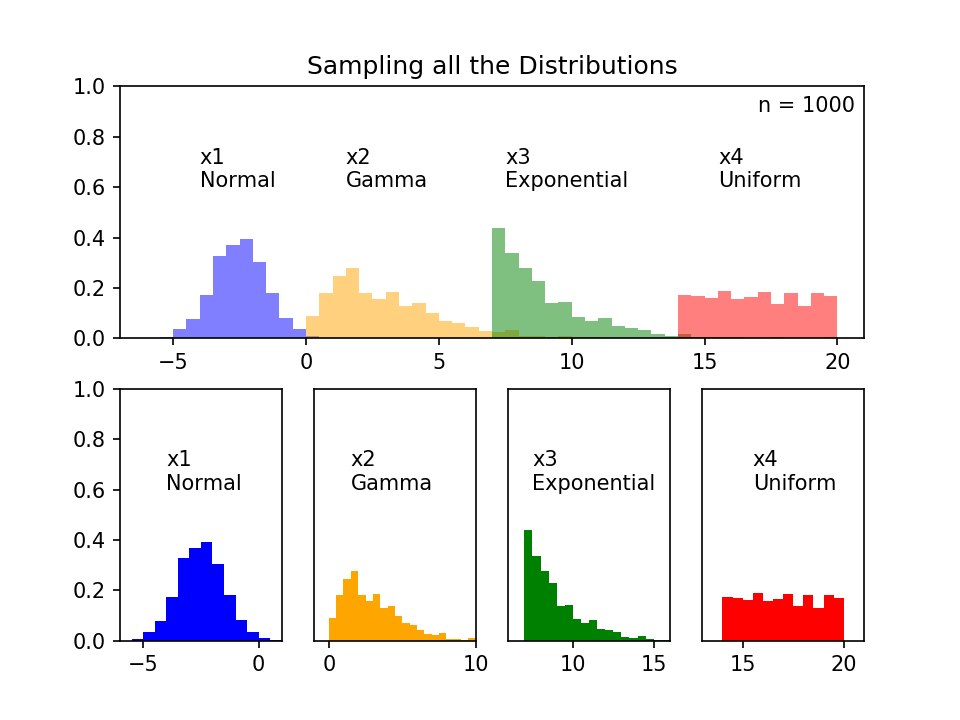

In [99]:
fig = plt.figure()
gspec = gridspec.GridSpec(2, 4)
top_all4 = plt.subplot(gspec[0, :])


normal_histogram = plt.subplot(gspec[1, 0])
gamma_histogram = plt.subplot(gspec[1, 1])
exponential_histogram = plt.subplot(gspec[1, 2])
uniform_histogram = plt.subplot(gspec[1, 3])

# fig, ((ax1,ax2,ax3,ax4), (ax5,ax6,ax7,ax8)) = plt.subplots(2, 4, sharex=True, sharey=True)
a = animation.FuncAnimation(fig, update, np.arange(100,10000,100))